In [1]:
import numpy as np
import tensorflow as tf

In [2]:
n_features = 7
m_examples = 1000

# The input examples. The i-th row contains the i-th example. 
X_true = np.random.rand(m_examples, n_features)

We have $X$, $m$ examples. Each example (each row) has $n$ features. Thus we have:
$$ 
\left[\begin{array}{cccc}
x_{11} & x_{12} & \ldots & x_{1n} \\
x_{21} & x_{22} & \ldots & x_{2n} \\
& & \vdots \\
x_{m1} & x_{m2} & \ldots & x_{mn}
\end{array}\right] \times
\left[\begin{array}{c}
w_1 \\ w_2 \\ \vdots \\ w_n
\end{array}\right] + b =
\left[\begin{array}{c}
y_1 \\ y_2 \\ \vdots \\ v_n
\end{array}\right]
$$

In [3]:
# This is what we wish linear regression to learn.
w_true = np.random.rand(n_features, 1) * 100.0
print "w = [%s]" % ', '.join(['%.2f' % x for x in w_true])

# The constant
b_true = np.random.rand(1) * 100.0 - 50.0
print "b = %.2f" % b_true[0]

# Noise
noise = np.random.rand(m_examples, 1) / 100.0

# These are our labeled "results". 
y_true = (np.matmul(X_true, w_true) + b_true) + noise

learning_rate = 0.3

w = [28.72, 16.31, 12.71, 91.46, 39.95, 22.81, 24.25]
b = 37.73


In [6]:
# Placeholder that is fed input data.
X_in = tf.placeholder(tf.float32, shape=(m_examples, n_features), name="X_in")
# Placeholder that is fed observed results.
y_in = tf.placeholder(tf.float32, shape=(m_examples, 1), name="y_in")

# The model: we assume y = X_in * w + b
w = tf.Variable(tf.truncated_normal((n_features, 1)), name="w")
b = tf.Variable(tf.constant(0.1, shape=(1,)), name="b")
y = tf.add(tf.matmul(X_in, w), b)

# The loss function: we are minimizing square root of mean 
loss_fn = tf.reduce_mean(tf.square(tf.subtract(y_in, y)))
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_fn)

# Initialize all variables.
init_op = tf.global_variables_initializer()
# For tracking errors
error = []

# The total number of batches.
batch_count = 100

# Steps per batch
steps_per_batch = 20

with tf.Session() as s:
    s.run(init_op)
    for batch in range(batch_count):
        for step in range(steps_per_batch):
            s.run(train_step, feed_dict={X_in: X_true, y_in: y_true})
        # Record the current error
        error.append(s.run(loss_fn, feed_dict={X_in: X_true, y_in: y_true}))
    w_computed = s.run(w)
    b_computed = s.run(b)

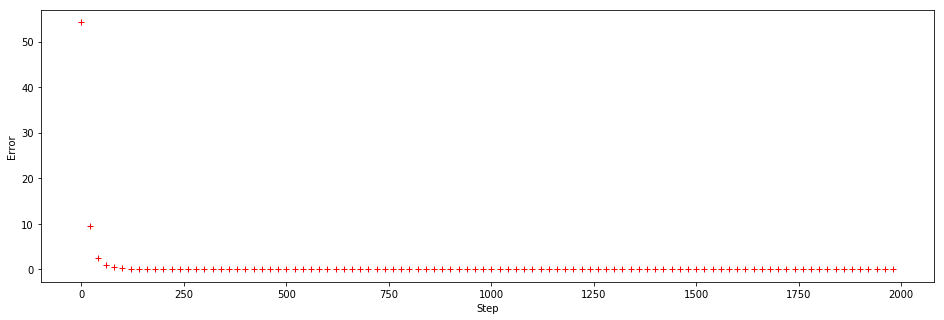

In [7]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(16,5))
plt.plot(range(0, batch_count * steps_per_batch, steps_per_batch), error, 'r+', linewidth=2)
plt.xlabel('Step')
plt.ylabel('Error')
plt.show()

In [8]:
print "w computed [%s]" % ', '.join(['%.3f' % x for x in w_computed.flatten()])
print "w actual   [%s]" % ', '.join(['%.3f' % x for x in w_true.flatten()])
print "b computed %.3f" % b_computed[0]
print "b actual  %.3f" % b_true[0]

w computed [28.721, 16.309, 12.711, 91.459, 39.954, 22.810, 24.250]
w actual   [28.721, 16.309, 12.712, 91.459, 39.955, 22.810, 24.250]
b computed 37.739
b actual  37.734


In [10]:
print error[-1]

8.44809e-06
